<a href="https://colab.research.google.com/github/skyil7/SejongUniv_ML/blob/master/1.%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EC%A0%84%EC%B2%98%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.filterwarnings(action='ignore')

## 데이터 실수화 <sup>Data Vectorization</sup>
- [블로그](https://skyil.tistory.com/101?category=425540)

### 범주형 데이터의 실수화: 원-핫 인코딩

In [2]:
x = [{'id':1, 'city':'Seoul'}, {'id':2, 'city':'Tokyo'}, {'id':3, 'city':'New York'}]
x

[{'city': 'Seoul', 'id': 1},
 {'city': 'Tokyo', 'id': 2},
 {'city': 'New York', 'id': 3}]

In [3]:
from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer(sparse=False)
vec.fit_transform(x) # x를 one-hot encoding

array([[0., 1., 0., 1.],
       [0., 0., 1., 2.],
       [1., 0., 0., 3.]])

#### sparse 옵션
sparse를 True로 하면, 데이터를 CSR 표현식으로 압축하여 메모리를 아낄 수 있지만, 데이터의 확인이 불가하다.

In [4]:
vec = DictVectorizer(sparse=True)
x = vec.fit_transform(x) # x를 one-hot encoding

In [5]:
x.toarray() # toarray() 함수를 활용하여 sparse를 풀어줄 수 있다.
vec.get_feature_names() 

['city=New York', 'city=Seoul', 'city=Tokyo', 'id']

### 텍스트 데이터의 실수화: Count, TF-IDF 방법
텍스트 데이터의 실수화에는 빈도를 세는 Count 방법과, 빈도와 중요도를 반비례 시키는 TF-IDF방법이 있다.

In [6]:
text=['떴다 떴다 비행기 날아라 날아라',
      '높이 높이 날아라 우리 비행기',
      '내가 만든 비행기 날아라 날아라',
      '멀리 멀리 날아라 우리 비행기']
text

['떴다 떴다 비행기 날아라 날아라',
 '높이 높이 날아라 우리 비행기',
 '내가 만든 비행기 날아라 날아라',
 '멀리 멀리 날아라 우리 비행기']

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer() # Sparse=True
t = vec.fit_transform(text).toarray() # toarray() 함수로 sparse 해제
# 판다스로 출력
import pandas as pd
tl = pd.DataFrame(t, columns=vec.get_feature_names())
tl.head()

,날아라,내가,높이,떴다,만든,멀리,비행기,우리
0,2,0,0,2,0,0,1,0
1,1,0,2,0,0,0,1,1
2,2,1,0,0,1,0,1,0
3,1,0,0,0,0,2,1,1


In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfid=TfidfVectorizer()
x2=tfid.fit_transform(text).toarray() # 높은 빈도는 낮은 가중치, 낮은 빈도는 높은 가중치
x3=pd.DataFrame(x2,columns=tfid.get_feature_names())
x3

,날아라,내가,높이,떴다,만든,멀리,비행기,우리
0,0.450735,0.000000,0.00000,0.86374,0.000000,0.00000,0.225368,0.000000
1,0.229589,0.000000,0.87992,0.00000,0.000000,0.00000,0.229589,0.346869
2,0.569241,0.545415,0.00000,0.00000,0.545415,0.00000,0.284620,0.000000
3,0.229589,0.000000,0.00000,0.00000,0.000000,0.87992,0.229589,0.346869


## 데이터 변환 <sup>Data Transformation</sup>
- [블로그](https://skyil.tistory.com/102?category=425540) 


일반적으로 정규화가 표준화보다 유용하나, bell-shape 데이터나 이상치가 있는 데이터에선 표준화가 유리하다.

### 데이터 표준화<sup>Data Standardization</sup>
$$ x_{standard} = \frac{x-\text{mean}(x)}{\text{std}(x)}$$
- 표준화는 모양은 유지하고 스케일을 바꾼다.
- 스케일에 주목하자.

[]

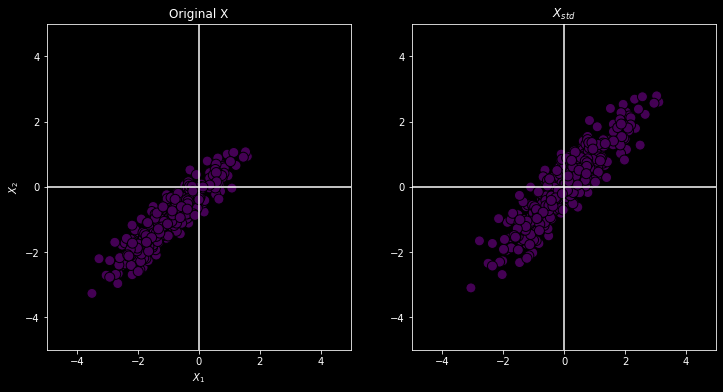

In [9]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

plt.style.use('dark_background')
# plt.style.use('fast')
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
X, y = make_classification(n_samples=500, n_features=2, n_informative=2, n_redundant=0,
                           n_clusters_per_class=1, random_state=6, n_classes=1)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=100,
            edgecolor="k", linewidth=1)
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.axvline(x=0, color = 'w')
plt.axhline(y=0, color = 'w')

plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.title('Original X')
plt.plot()

from sklearn.preprocessing import StandardScaler
stdScale = StandardScaler()
std = stdScale.fit_transform(X)

plt.subplot(1,2,2)
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.axvline(x=0, color = 'w')
plt.axhline(y=0, color = 'w')
plt.scatter(std[:, 0], std[:, 1], marker='o', c=y, s=100,
            edgecolor="k", linewidth=1)
plt.title('$X_{std}$')
plt.plot()

### 데이터 정규화<sup>Data Normalization</sup>
$$ x_{normal} = \frac{x-\text{min}(x)}{\text{max}(x)-\text{min}(x)}$$

[]

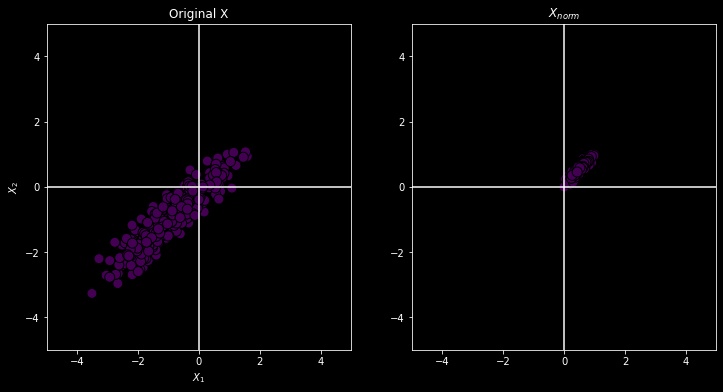

In [10]:
import matplotlib.pyplot as plt

# plt.style.use('dark_background')
# plt.style.use('fast')
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
X, y = make_classification(n_samples=500, n_features=2, n_informative=2, n_redundant=0,
                           n_clusters_per_class=1, random_state=6, n_classes=1)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=100,
            edgecolor="k", linewidth=1)
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.axvline(x=0, color = 'white')
plt.axhline(y=0, color = 'white')

plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.title('Original X')
plt.plot()

from sklearn.preprocessing import MinMaxScaler
normScale = MinMaxScaler()
norm = normScale.fit_transform(X)

plt.subplot(1,2,2)
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.axvline(x=0, color = 'w')
plt.axhline(y=0, color = 'w')
plt.scatter(norm[:, 0], norm[:, 1], marker='o', c=y, s=100,
            edgecolor="k", linewidth=1)
plt.title('$X_{norm}$')
plt.plot()

## 데이터 정제<sup>Data Cleaning</sup>
- 데이터 내에 존재하는 결측치를 제거하는 과정

In [11]:
import numpy as np
import pandas as pd
people = [{'height': 180, 'weight': 72}, {'height': np.nan, 'weight': 68}, {'height': 180, 'weight': 68}, {'height': 175, 'weight': None}]
people = pd.DataFrame(people)
people

,height,weight
0,180.0,72.0
1,NaN,68.0
2,180.0,68.0
3,175.0,NaN


In [12]:
from sklearn.impute import SimpleImputer
im = SimpleImputer(missing_values=np.nan, strategy='mean') # strategy는 mean, median, most_frequent가 있다.
people = im.fit_transform(people)
pd.DataFrame(people)

,0,1
0,180.000000,72.000000
1,178.333333,68.000000
2,180.000000,68.000000
3,175.000000,69.333333


## 데이터 통합<sup>Data Integration</sup>

In [13]:
import pandas as pd
name = [{'id':1, 'name':'Gio'}, {'id':2, 'name':'Juno'}, {'id':3, 'name':'Minchul'}]
age = [{'id':1, 'age':21}, {'id':2, 'age':19}, {'id':3, 'age': 25}]
name = pd.DataFrame(name)
age = pd.DataFrame(age)

In [14]:
pd.merge(name, age, on='id')

,id,name,age
0,1,Gio,21
1,2,Juno,19
2,3,Minchul,25


## 데이터 균형<sup>Data Balancing</sup>
과대포집을 통한 데이터 불균형 해소

In [15]:
# 더미 불균형 데이터 생성
from collections import Counter
from sklearn.datasets import make_classification
X, y = make_classification(n_classes=3, weights=[0.03, 0.07,0.9],n_features=2, n_informative=2, n_redundant=0,
                           n_clusters_per_class=1, n_samples=200, random_state=154)
print('Original dataset shape %s' % Counter(y)) 

Original dataset shape Counter({2: 179, 1: 14, 0: 7})


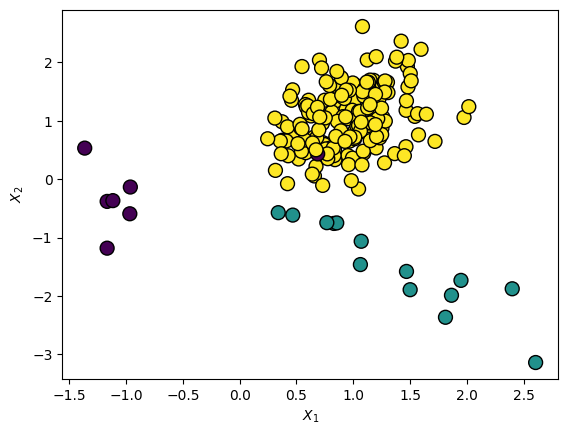

In [16]:
import matplotlib.pyplot as plt
plt.style.use('default')
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
            s=100, edgecolor="k", linewidth=1)
 
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.show()

### 과대포집: SMOTE

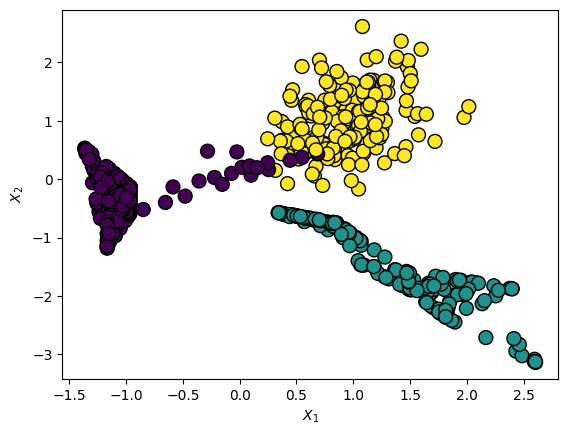

In [17]:
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE, ADASYN
sm = SMOTE(random_state=777)
X_res, y_res = sm.fit_resample(X, y)
plt.scatter(X_res[:, 0], X_res[:, 1], marker='o', c=y_res,
            s=100, edgecolor="k", linewidth=1)
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.show()

### 과대포집: ADASYN

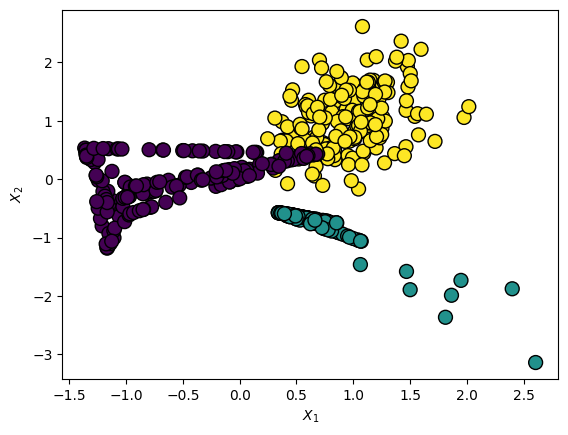

In [18]:
import matplotlib.pyplot as plt
ada=ADASYN(random_state=777)
X_syn,y_syn=ada.fit_resample(X,y)
plt.scatter(X_syn[:, 0], X_syn[:, 1], marker='o', c=y_syn,
            s=100, edgecolor="k", linewidth=1)
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.show()

### 과소포집

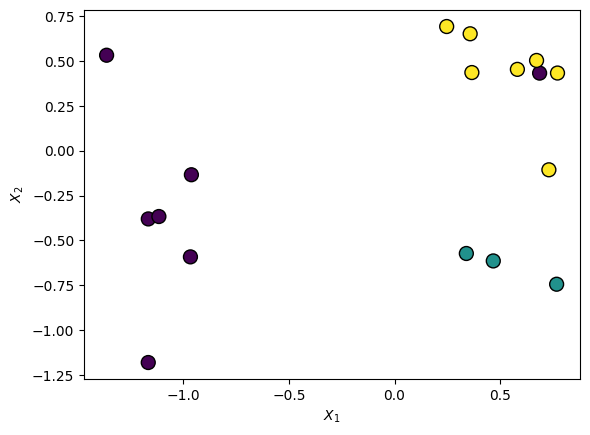

In [19]:
from imblearn.under_sampling import NearMiss
# define the undersampling method
undersample = NearMiss(version=3, n_neighbors_ver3=3)
# transform the dataset
X_Under, y_Under = undersample.fit_resample(X, y)
import matplotlib.pyplot as plt
plt.scatter(X_Under[:, 0], X_Under[:, 1], marker='o', c=y_Under,
            s=100, edgecolor="k", linewidth=1)
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.show()